# Importing Required Libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
df=pd.read_csv(r"C:\Users\Bindu\Downloads\archive (13)\disciplinary.csv")


In [9]:
df.head(10)


,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
0,1,João Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5
5,6,Casemiro,Real Madrid,Midfielder,17,18,3,0,914,11
6,6,Éder Militão,Real Madrid,Defender,17,16,4,0,1076,12
7,6,Otamendi,Benfica,Defender,17,11,2,0,810,9
8,6,Gravenberch,Ajax,Midfielder,17,11,1,0,703,8
9,6,Haller,Ajax,Forward,17,11,1,0,668,8


In [10]:
df.describe()  


,serial,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,261.876712,4.960616,4.525685,0.842466,0.042808,374.214041,5.690068
std,154.692375,3.774995,4.247815,0.933011,0.210895,230.626235,2.467248
min,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,146.000000,2.000000,1.000000,0.000000,0.000000,193.500000,4.000000
50%,263.000000,4.000000,3.000000,1.000000,0.000000,349.500000,5.500000
75%,417.000000,6.000000,7.000000,1.000000,0.000000,520.750000,7.000000
max,491.000000,23.000000,24.000000,4.000000,2.000000,1199.000000,13.000000


# Fetching the Null values

In [11]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  584


,Total Missing,In Percent
serial,0,0.0
player_name,0,0.0
club,0,0.0
position,0,0.0
fouls_committed,0,0.0
fouls_suffered,0,0.0
red,0,0.0
yellow,0,0.0
minutes_played,0,0.0
match_played,0,0.0


# Dropping irrelevant Data

In [12]:
df=df.drop(['player_name'],axis=1)


In [13]:
df.head()

,serial,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
0,1,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Man. City,Midfielder,19,4,2,0,842,10
3,2,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Club Brugge,Midfielder,18,3,4,0,407,5


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Fouls committed

In [15]:
Q=df['fouls_committed'].value_counts()
P=df['club'].value_counts()

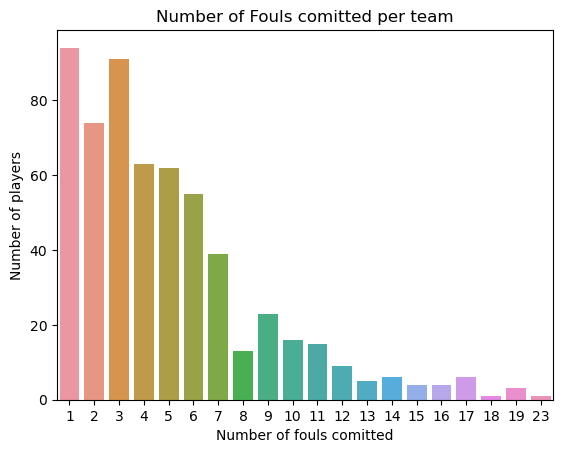

In [16]:
sns.barplot(x=Q.index, y=Q.values)

plt.xlabel('Number of fouls comitted')
plt.ylabel('Number of players')
plt.title('Number of Fouls comitted per team')
plt.savefig('Number of Fouls comitted per team')
plt.show()

# Plot for Position

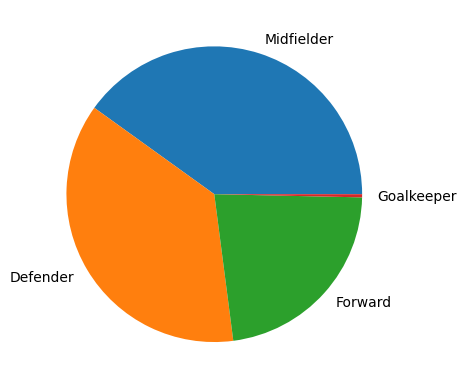

In [17]:
plt.pie(df['position'].value_counts().values,labels=df['position'].value_counts().index)
plt.show()

# Plot for Teams played

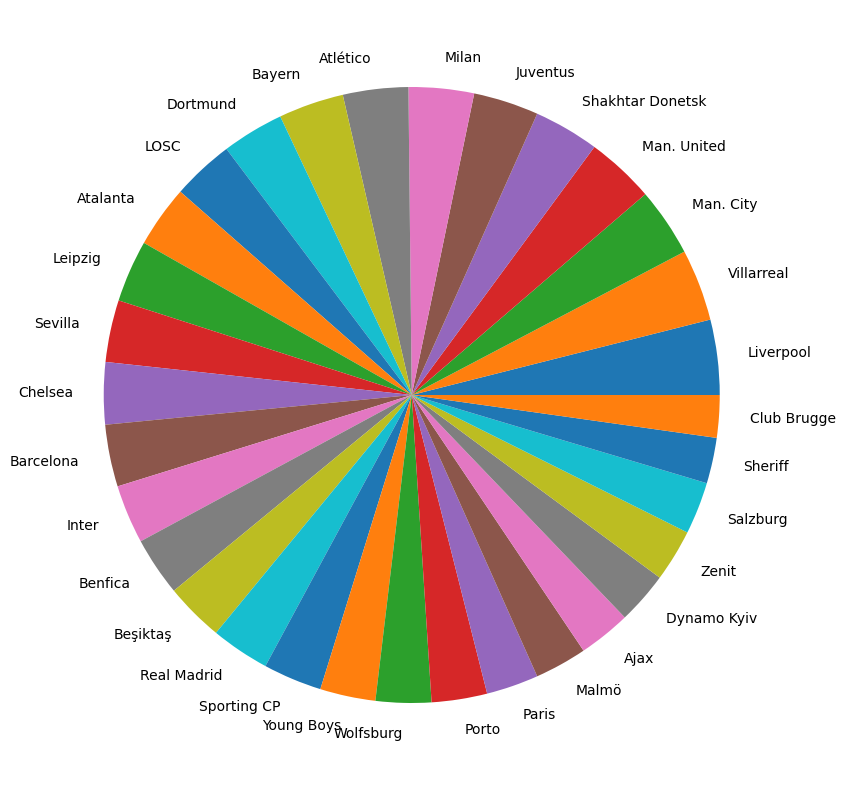

In [18]:
fig = plt.figure(figsize = (10, 10))
plt.pie(df['club'].value_counts().values,labels=df['club'].value_counts().index)
plt.show()

# Cross Plot for type of cards

In [19]:
A=df['red'].value_counts()
B=df['yellow'].value_counts()

Text(0, 0.5, 'number of players')

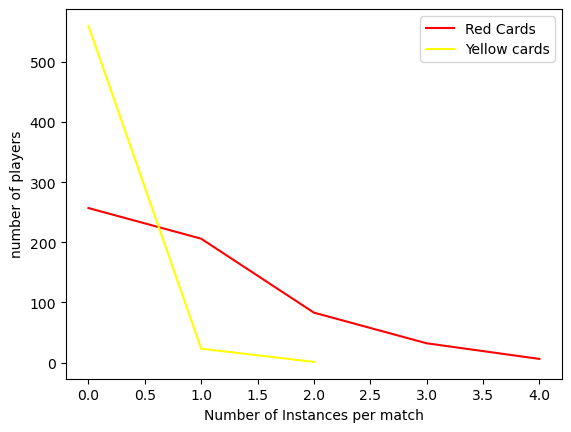

In [20]:
fig, cards=plt.subplots()
cards.plot(A.index,A.values,color='red')
cards.plot(B.index,B.values,color='yellow')
plt.legend(["Red Cards", "Yellow cards"],loc=0, frameon=True)
plt.xlabel('Number of Instances per match')
plt.ylabel('number of players')

# Cross Plotting betweeen Position and Yellow Cards

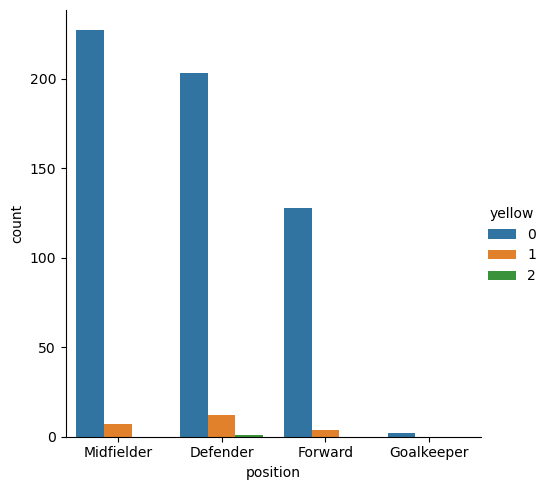

In [21]:
sns.catplot(x="position",hue="yellow",kind="count", data=df)


# Cross Plot betweeen Position played and number of fouls committed

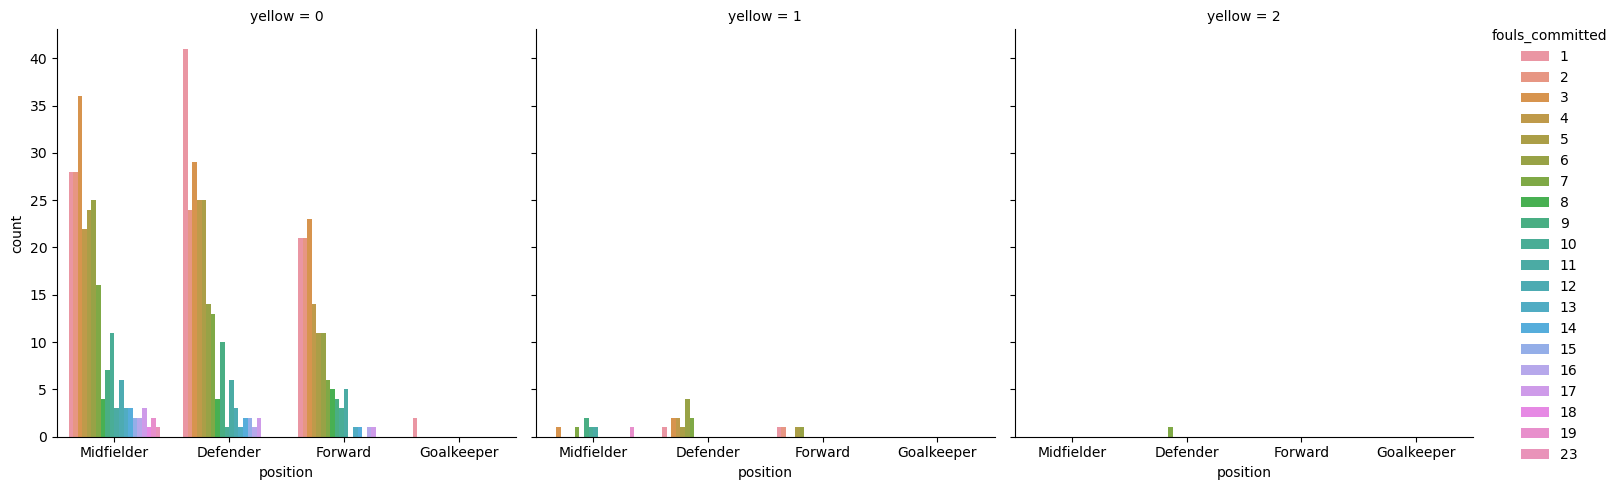

In [22]:
sns.catplot(x="position",hue="fouls_committed",kind="count", col='yellow', data=df)


# Cross Plot betweeen Position played and number of fouls suffered

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
import warnings

In [24]:
warnings.filterwarnings('ignore')  # ignore notifications


In [39]:
df_attacking = pd.read_csv(r"C:\Users\Bindu\Downloads\archive (13)\attacking.csv")
df_attempts = pd.read_csv(r"C:\Users\Bindu\Downloads\archive (13)\attacking.csv")
df_defending = pd.read_csv(r"C:\Users\Bindu\Downloads\archive (13)\defending.csv")
df_distributon = pd.read_csv(r"C:\Users\Bindu\Downloads\archive (13)\distributon.csv")
df_goalkeeping = pd.read_csv(r"C:\Users\Bindu\Downloads\archive (13)\goalkeeping.csv")
df_goals = pd.read_csv(r"C:\Users\Bindu\Downloads\archive (13)\goals.csv")
df_key_stats = pd.read_csv(r"C:\Users\Bindu\Downloads\archive (13)\key_stats.csv")
df_disciplinary=pd.read_csv(r"C:\Users\Bindu\Downloads\archive (13)\disciplinary.csv")

In [26]:
df_attacking


,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9
...,...,...,...,...,...,...,...,...,...
171,64,Tolisso,Bayern,Midfielder,1,0,0,0,4
172,64,Schuurs,Ajax,Defender,1,0,0,0,3
173,64,Kryvtsov,Shakhtar Donetsk,Defender,1,0,0,0,3
174,64,Stanišić,Bayern,Defender,1,0,0,0,2


In [27]:
df_defending

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12
...,...,...,...,...,...,...,...,...,...,...
622,578,Maier,Young Boys,Midfielder,1,0,0,0,0,1
623,578,Zhegrova,LOSC,Midfielder,1,0,0,0,0,1
624,578,Zesiger,Young Boys,Defender,1,0,0,0,0,1
625,578,Zakaria,Juventus,Midfielder,1,0,0,0,0,1


In [28]:
df_goalkeeping

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6
5,6,Oblak,Atlético,Goalkeeper,26,10,0,3,2,10
6,7,Musso,Atalanta,Goalkeeper,21,13,0,1,1,6
7,8,Ersin Destanoğlu,Beşiktaş,Goalkeeper,20,17,0,0,0,5
8,9,De Gea,Man. United,Goalkeeper,19,9,0,1,0,7
9,9,Dahlin,Malmö,Goalkeeper,19,8,1,0,3,4


In [31]:
df_goals

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,73,Yansané,Sheriff,Forward,1,0,0,1,0,1,0,0,3
179,73,Yakhshiboev,Sheriff,Forward,1,0,0,1,0,1,0,0,3
180,73,Messias Junior,Milan,Forward,1,0,0,1,0,1,0,0,2
181,73,Morato,Benfica,Defender,1,0,0,1,0,1,0,0,2


# Top Goalscorers

In [33]:
df_goals.head(10)



,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6
5,5,Mahrez,Man. City,Midfielder,7,1,4,2,0,7,0,2,12
6,7,Mbappé,Paris,Forward,6,6,0,0,0,6,0,0,8
7,7,Núñez,Benfica,Forward,6,5,0,1,0,6,0,1,10
8,7,Ronaldo,Man. United,Forward,6,5,0,1,0,4,2,0,7
9,7,Danjuma,Villarreal,Midfielder,6,3,3,0,0,6,0,1,11


In [34]:
g_right_foot = df_goals.sum()['right_foot']
g_left_foot = df_goals.sum()['left_foot']
g_headers = df_goals.sum()['headers']
g_others = df_goals.sum()['others']

# Righ footer or Left Footers -->Who Scored More???

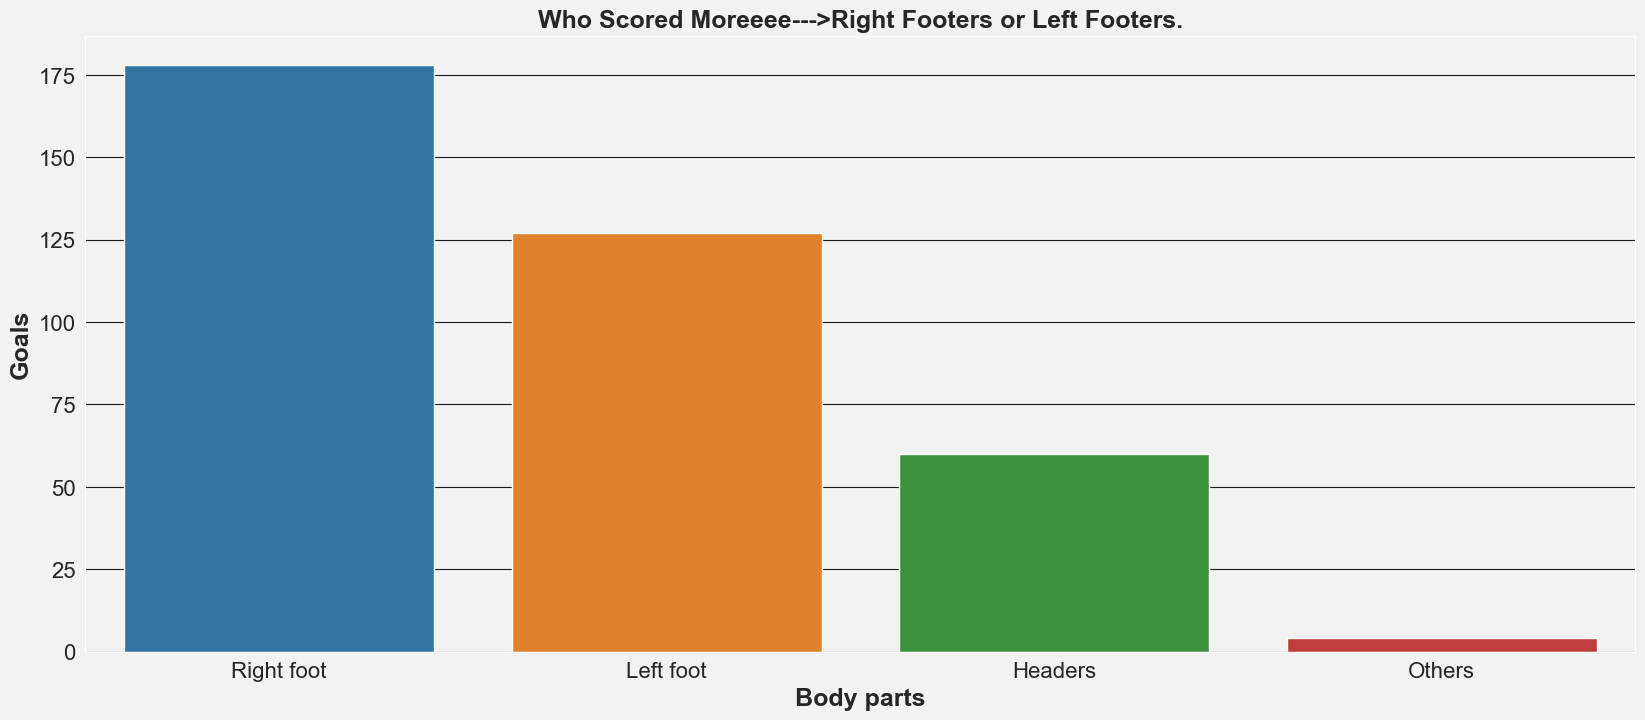

In [36]:
plt.figure(figsize=(20, 8))
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})
plt.title('Who Scored Moreeee--->Right Footers or Left Footers.', fontsize=18, fontweight='bold')
plt.xlabel('Body parts', fontsize=18, fontweight='bold')
plt.ylabel('Goals', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x=['Right foot', 'Left foot', 'Headers', 'Others'], y=[df_goals['right_foot'].sum(),
                                                                   df_goals['left_foot'].sum(),
                                                                   df_goals['headers'].sum(),
                                                                   df_goals['others'].sum()])
plt.show()

# Number of Fouls Conceded by Teams(In Descending Order)

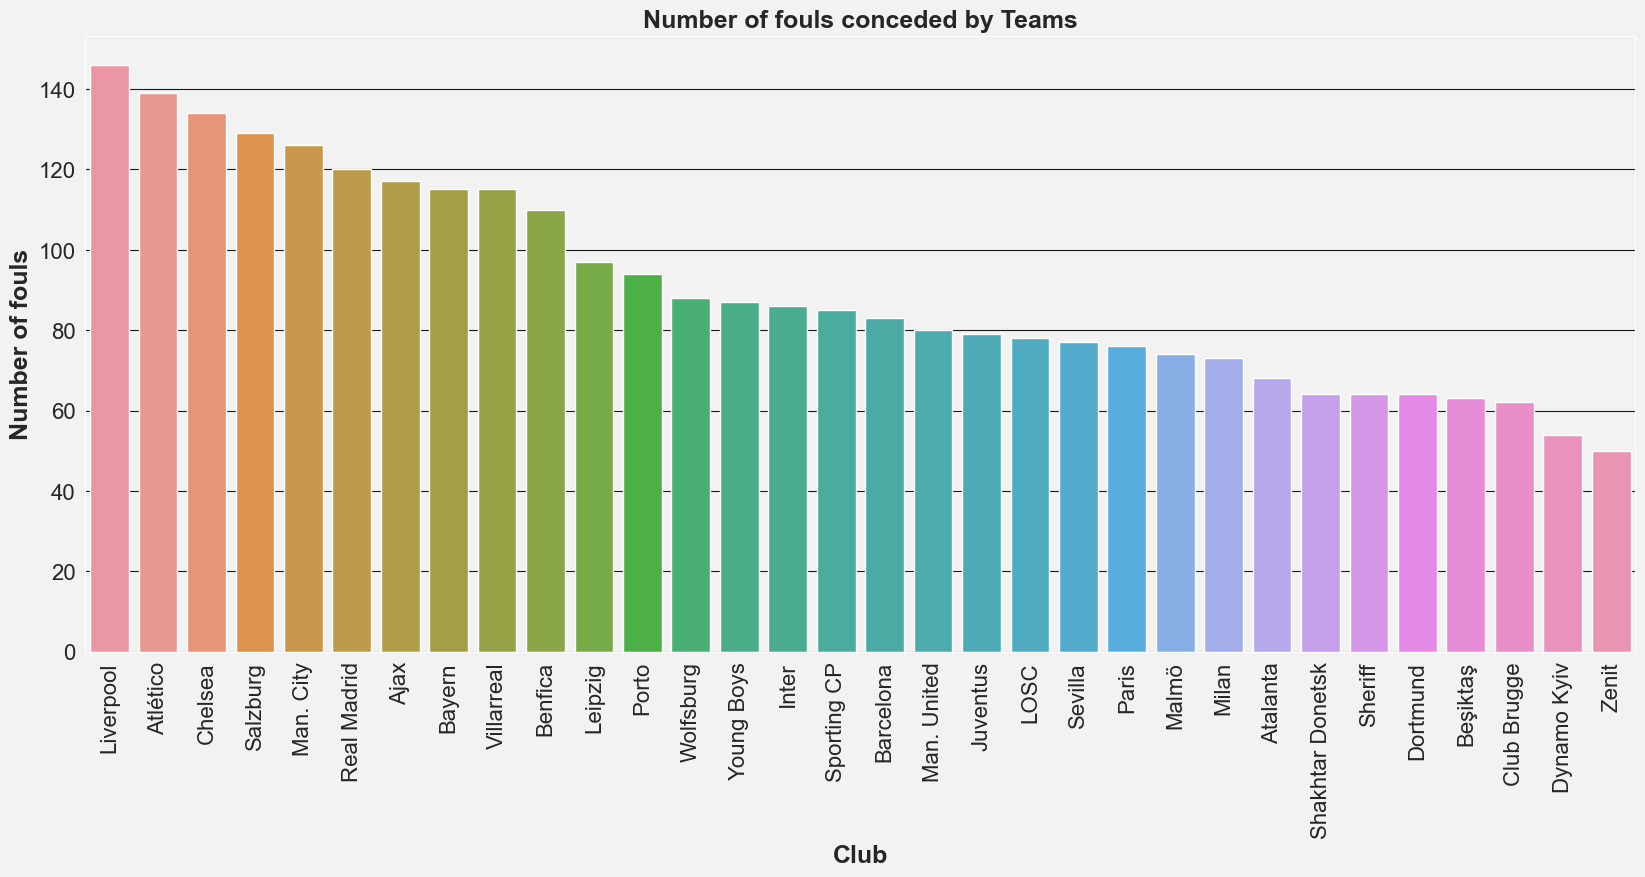

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_disciplinary is your DataFrame
df_disciplinary_sorted = df_disciplinary.groupby('club').sum().sort_values(by='fouls_committed', ascending=False)

plt.figure(figsize=(20, 8))
plt.title('Number of fouls conceded by Teams', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})
sns.barplot(x=df_disciplinary_sorted.index,
            y=df_disciplinary_sorted['fouls_committed'].values)

plt.xlabel('Club', fontsize=18, fontweight='bold')
plt.ylabel('Number of fouls', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()


# Most Assists

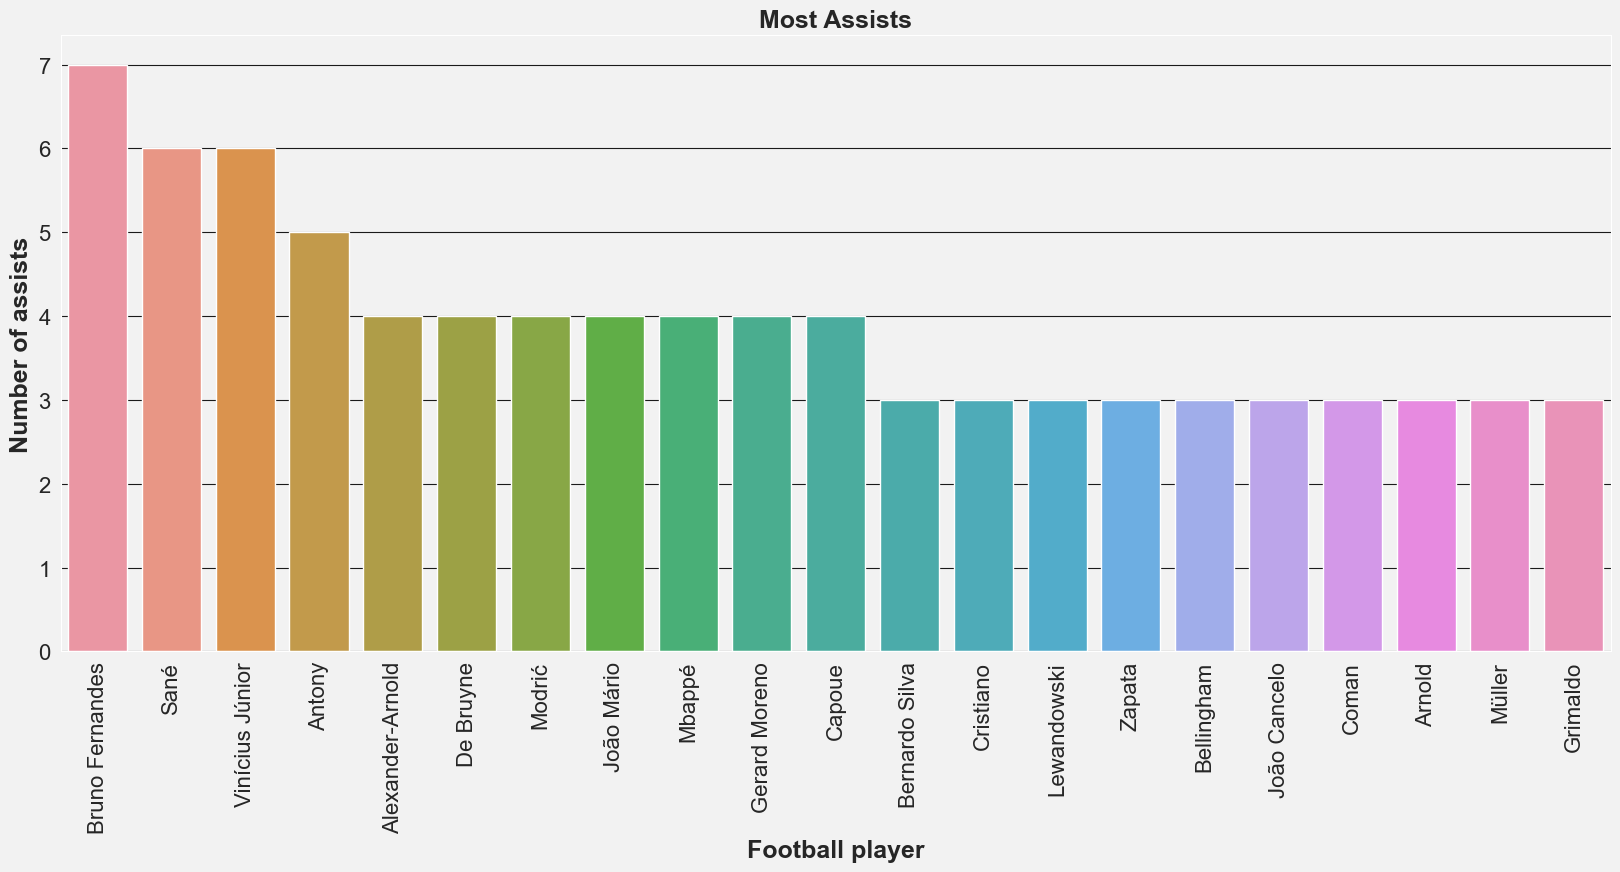

In [43]:
plt.figure(figsize=(20, 8))
plt.title('Most Assists', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=df_attacking.sort_values('assists', ascending=False)[0:21]['player_name'],
            y=df_attacking.sort_values('assists', ascending=False)[0:21]['assists'])
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Number of assists', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

# Most Goals

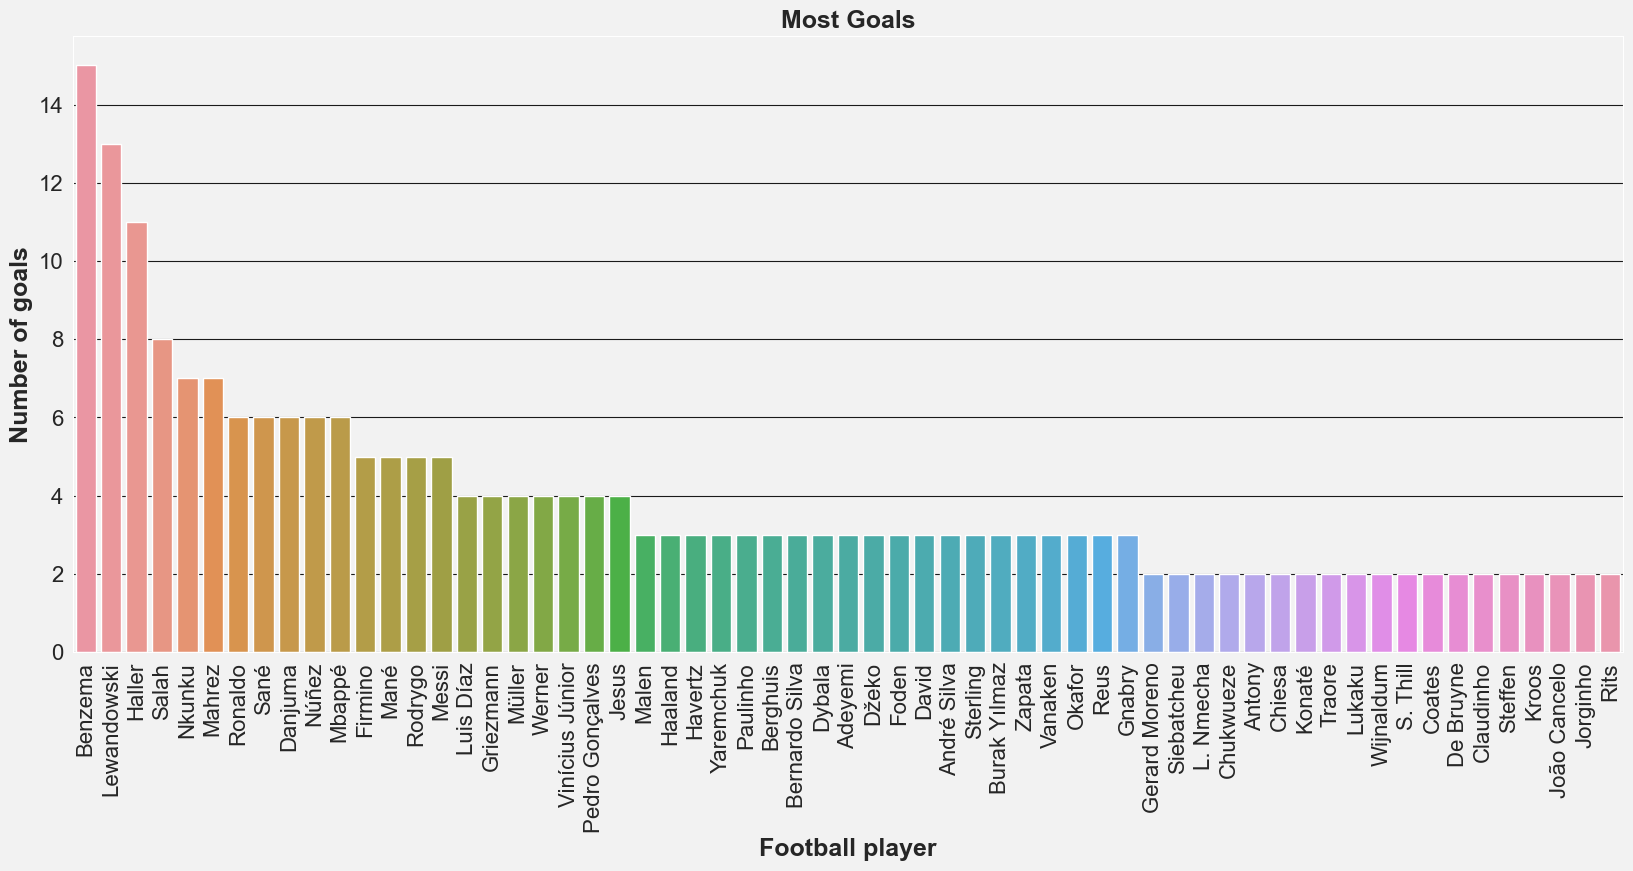

In [44]:
df_players = df_goals.loc[0:41, ['player_name', 'goals']]
plt.figure(figsize=(20, 8))
plt.title('Most Goals', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=df_goals.sort_values('goals', ascending=False)['player_name'][0:61],
            y=df_goals.sort_values('goals', ascending=False)['goals'][0:61])
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Number of goals', fontsize=18, fontweight='bold')
plt.show()

# Best Dribblers

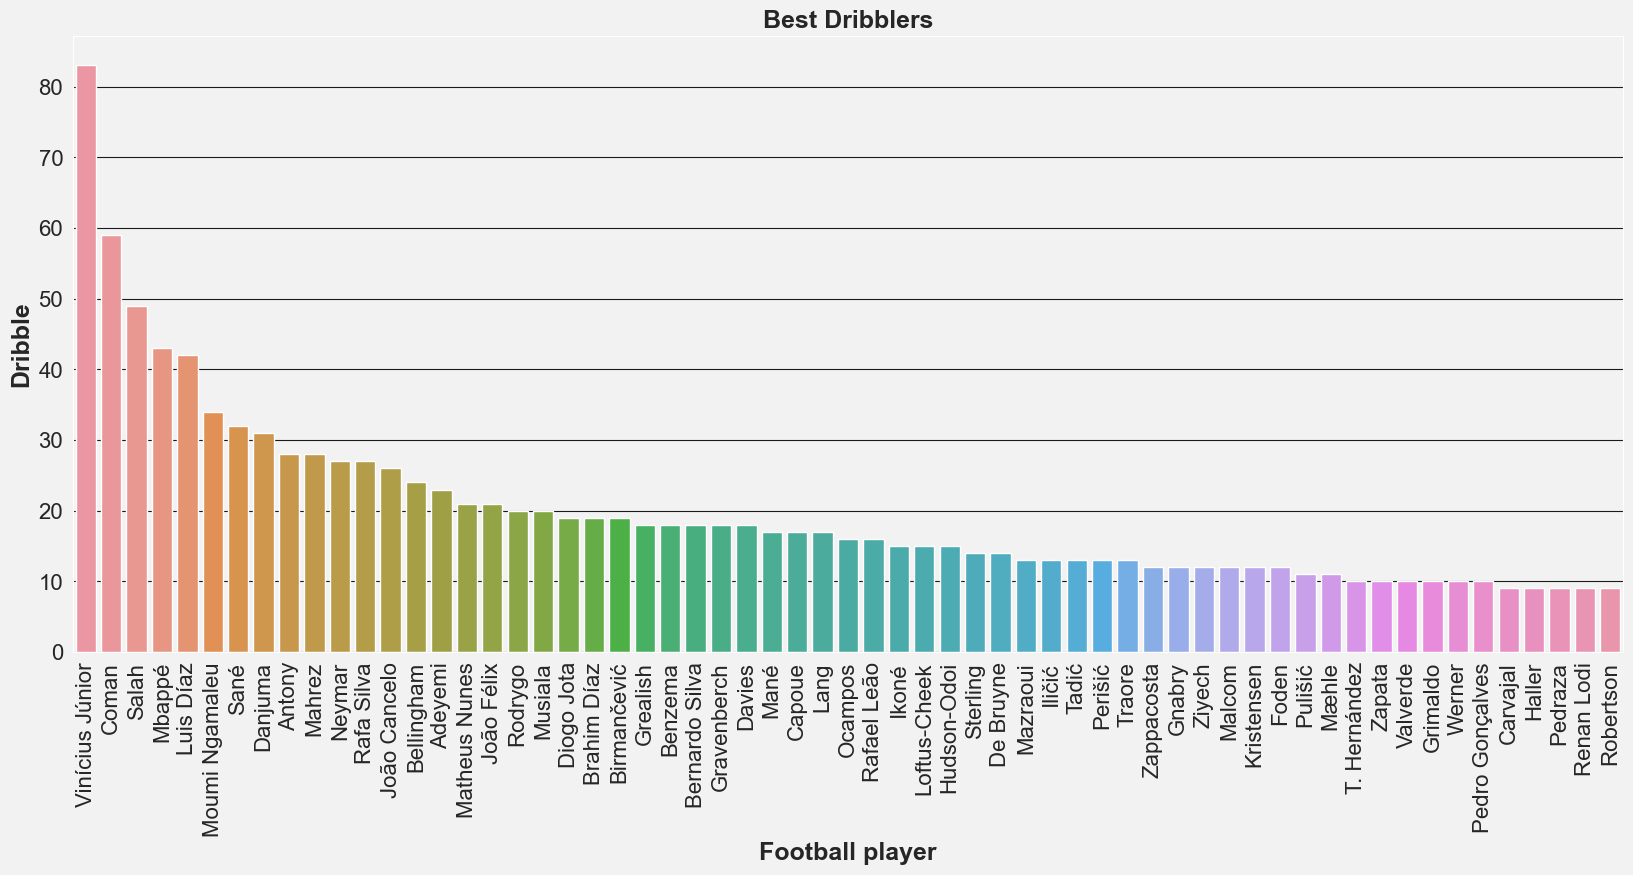

In [45]:
plt.figure(figsize=(20, 8))
plt.title('Best Dribblers', fontsize=18, fontweight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})
sns.barplot(x=df_attacking.sort_values('dribbles', ascending=False)[0:61]['player_name'],
            y=df_attacking.sort_values('dribbles', ascending=False)[0:61]['dribbles'])
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Dribble', fontsize=18, fontweight='bold')
plt.show()

# Most Goals(Clubs)

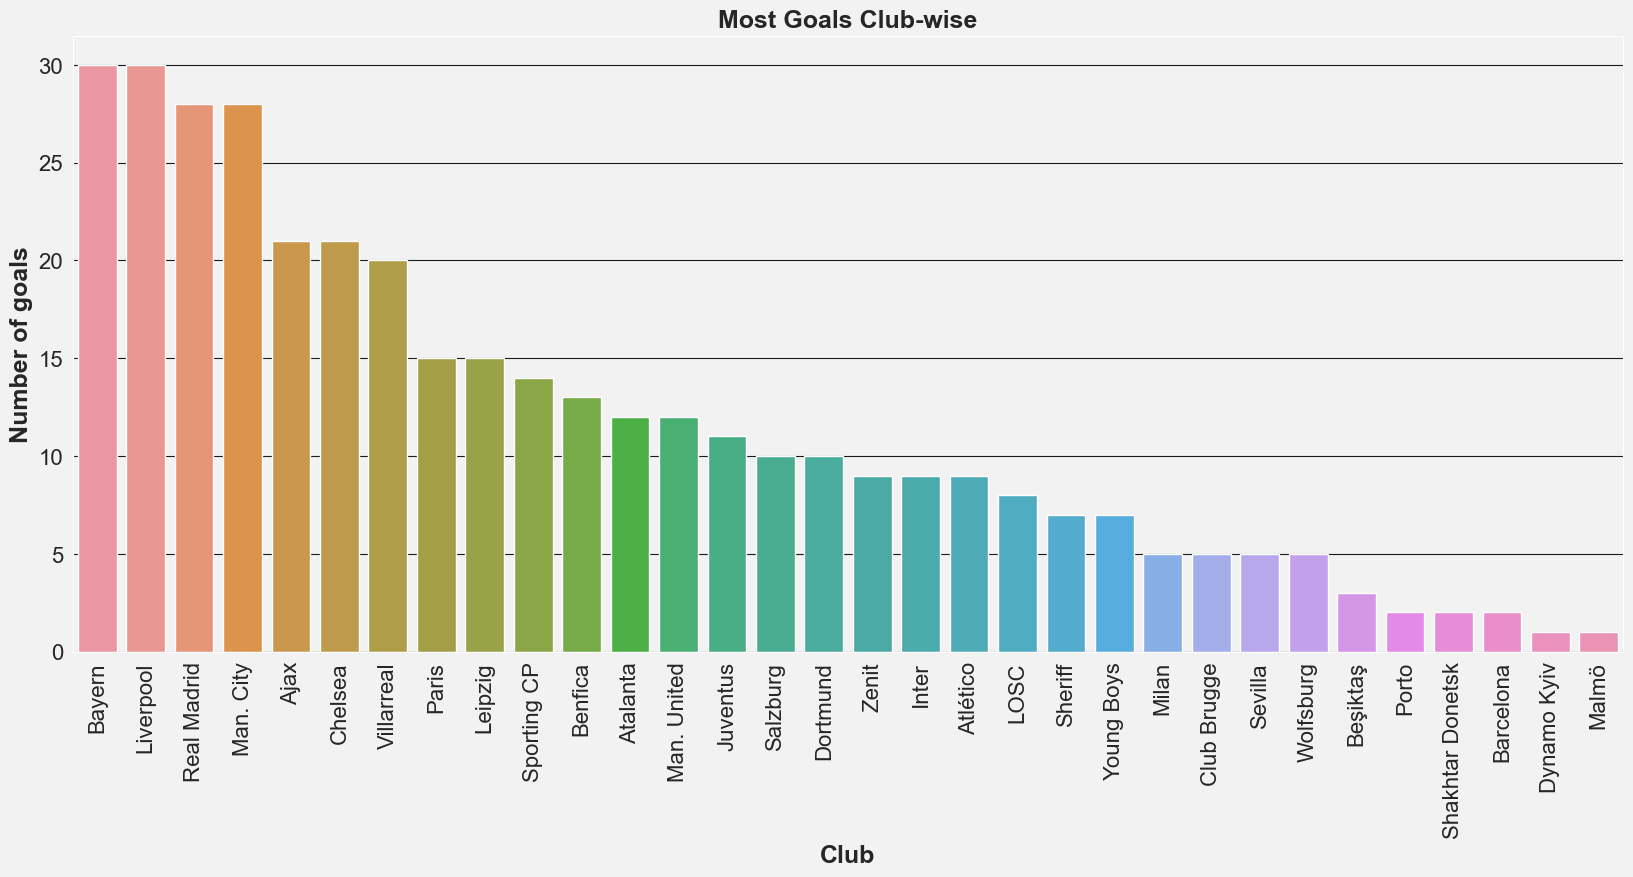

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_goals is your DataFrame
df_goals_sorted = df_goals.groupby('club').sum().sort_values(by='goals', ascending=False)

plt.figure(figsize=(20, 8))
plt.title('Most Goals Club-wise', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})
sns.barplot(x=df_goals_sorted.index,
            y=df_goals_sorted['goals'].values)
plt.xlabel('Club', fontsize=18, fontweight='bold')
plt.ylabel('Number of goals', fontsize=18, fontweight='bold')
plt.show()


# Best Goalkeeper of the Season

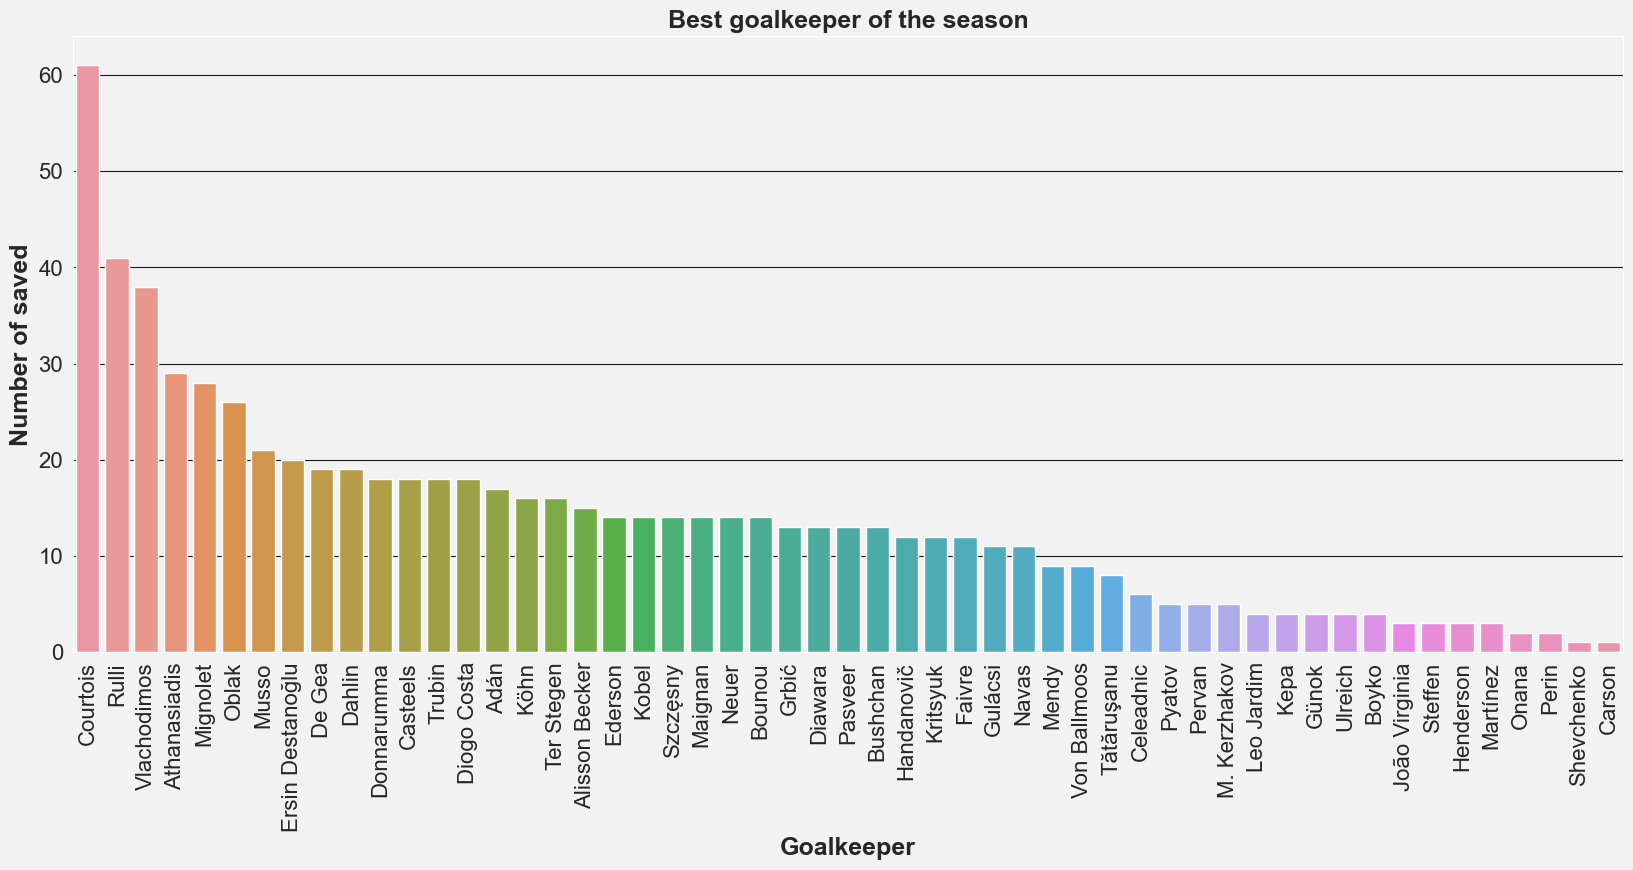

In [48]:
plt.figure(figsize=(20, 8))
plt.title('Best goalkeeper of the season', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x = df_goalkeeping.sort_values('saved', ascending=False)['player_name'], 
            y=df_goalkeeping.sort_values('saved', ascending=False)['saved'])
plt.xlabel('Goalkeeper', fontsize=18, fontweight='bold')
plt.ylabel('Number of saved', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

# Most Nuumber Of Completed Passes

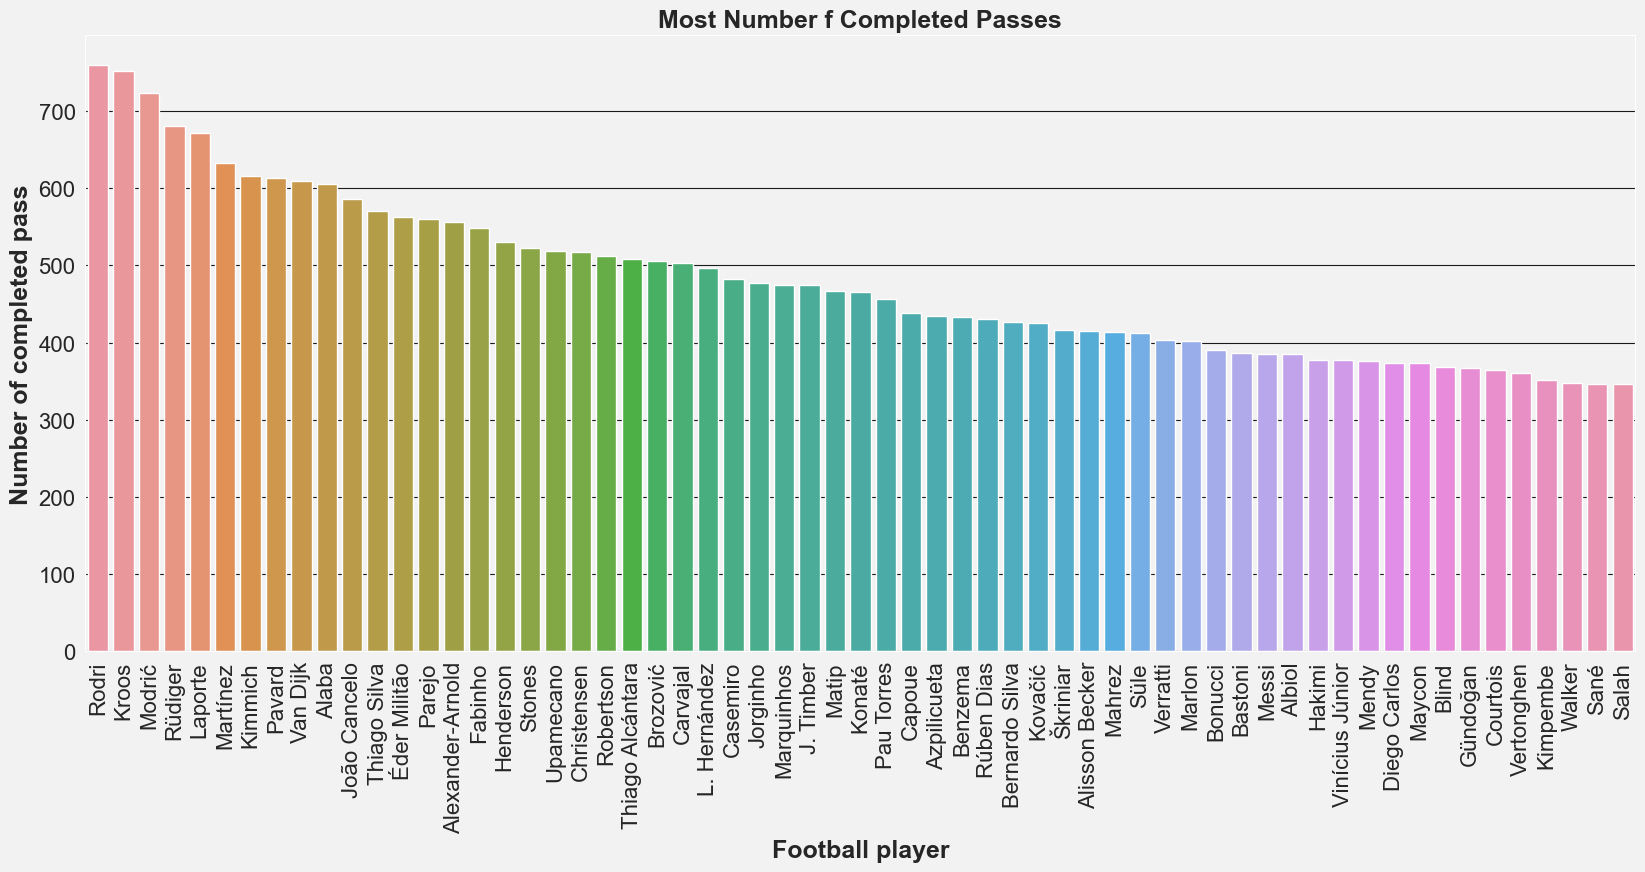

In [51]:
plt.figure(figsize=(20, 8))
plt.title('Most Number f Completed Passes', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})
sns.barplot(x=df_distributon.sort_values(by='pass_completed', ascending=False)[0:61]['player_name'],
            y=df_distributon.sort_values(by='pass_completed', ascending=False)[0:61]['pass_completed'])
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Number of completed pass', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()